In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jupyter_contrib_nbextensions
import seaborn as sns
import scipy.fftpack
import scipy.io
sns.set()

In [2]:
## general simulation parameters
fs = 1024
npnts = fs*5+1 # 5 seconds
# centered time vector
timevec = np.arange(0,npnts)/fs
timevec = timevec - np.mean(timevec)
# for power spectrum
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

In [3]:
## Morlet wavelet
# parameters
freq = 4 # peak frequency
csw  = np.cos(2*np.pi*freq*timevec) # cosine wave
fwhm = .5 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*timevec**2) / fwhm**2 ) # Gaussian

# Morlet Wavelet

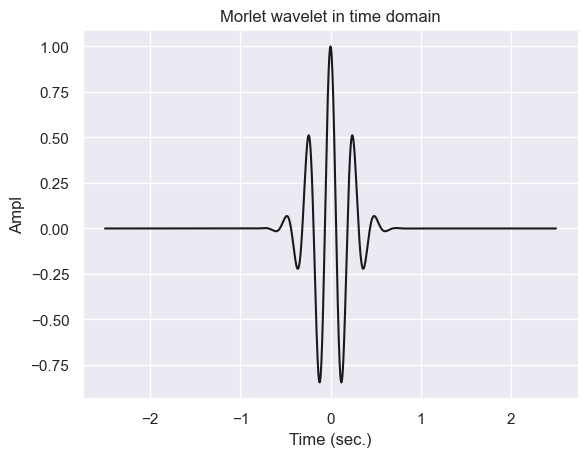

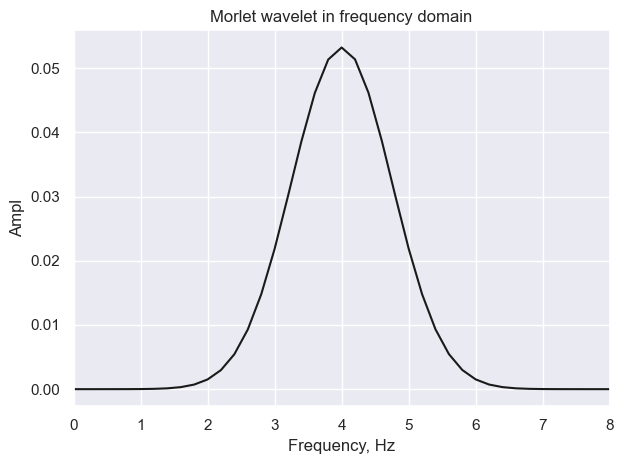

In [4]:
MorletWavelet = csw * gaussian #  по сути произведение синуса и Гаусса
MorletWaveletPow = np.abs(np.fft.fft(MorletWavelet)/npnts)

# time domain
plt.title('Morlet wavelet in time domain')
plt.plot(timevec,MorletWavelet,'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Ampl')
plt.show()

# frequency domain
plt.title('Morlet wavelet in frequency domain')
plt.plot(hz,MorletWaveletPow[:len(hz)],'k')
plt.xlim(0,8)
plt.xlabel('Frequency, Hz')
plt.ylabel('Ampl')
plt.tight_layout()
plt.show()

# Mexican Hat Wavelet

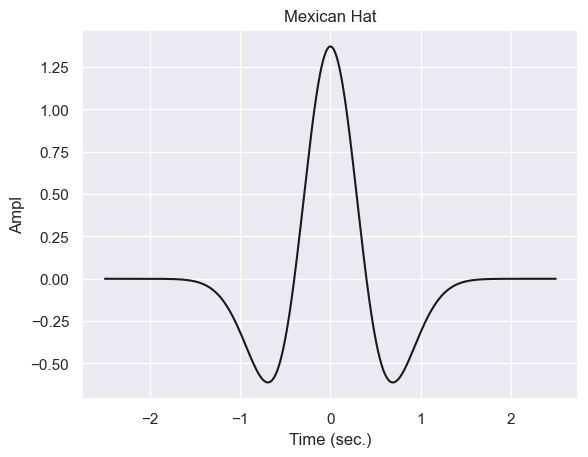

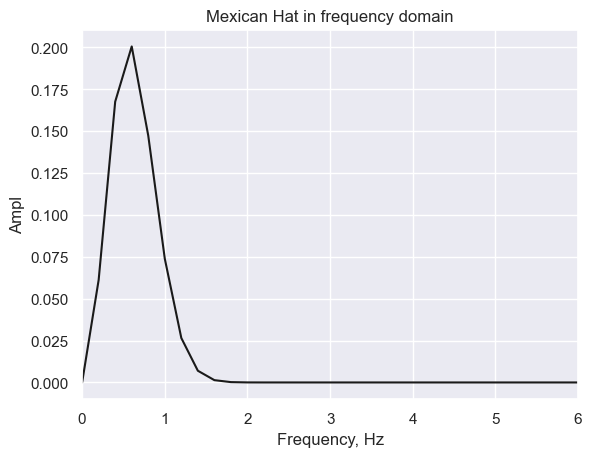

In [5]:
s = .4
MexicanWavelet = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (timevec**2)/(s**2) ) * np.exp( (-timevec**2)/(2*s**2))
MexicanPow = np.abs(scipy.fftpack.fft(MexicanWavelet)/npnts)

plt.title('Mexican Hat')
plt.plot(timevec,MexicanWavelet,'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Ampl')
plt.show()

plt.title('Mexican Hat in frequency domain')
plt.plot(hz,MexicanPow[:len(hz)],'k')
plt.xlim(0,6)
plt.xlabel('Frequency, Hz')
plt.ylabel('Ampl')
plt.show()

# Haar Wavelet

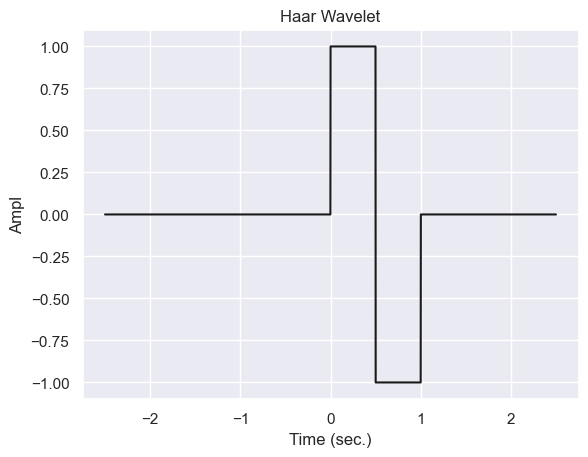

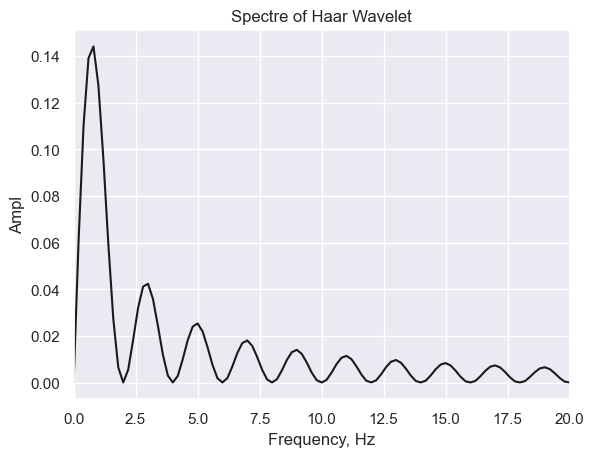

In [6]:
HaarWavelet = np.zeros(npnts)
HaarWavelet[np.argmin(timevec**2) : np.argmin((timevec-.5)**2) ] = 1
HaarWavelet[np.argmin((timevec-.5)**2) : np.argmin((timevec-1-1/fs)**2)] = -1

plt.title('Haar Wavelet')
plt.plot(timevec, HaarWavelet,'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Ampl')
plt.show()

plt.title('Spectre of Haar Wavelet')
plt.plot(hz, np.abs(scipy.fftpack.fft(HaarWavelet)/npnts)[:len(hz)],'k')
plt.xlim(0,20)
plt.xlabel('Frequency, Hz')
plt.ylabel('Ampl')
plt.show()

# Convolution of Wavelets with different signals

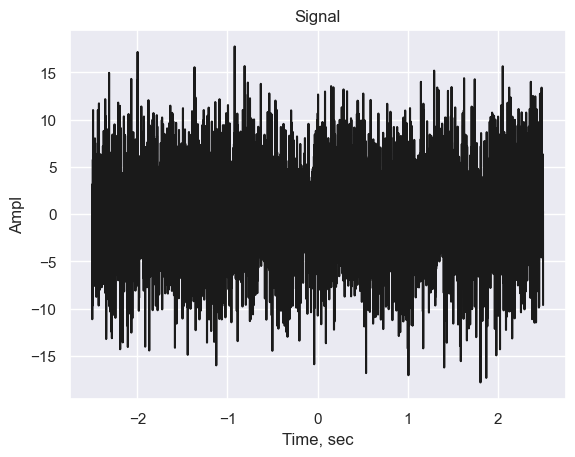

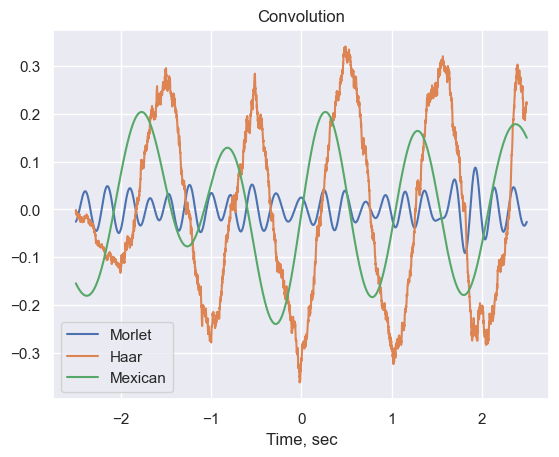

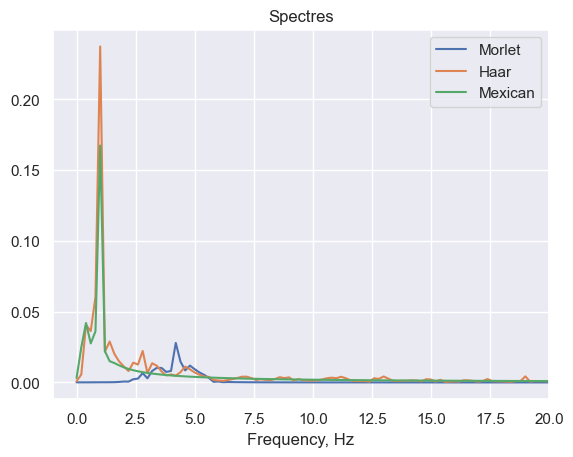

In [7]:
# signal
signal = np.sin(2 * np.pi * timevec) + np.random.normal(scale=5, size=len(timevec))
+ np.cos(2 * np.pi * timevec)

mw = np.convolve(signal,MorletWavelet,'same')
mw = mw * 2 / len(mw)
hw = np.convolve(signal,HaarWavelet,'same')
hw = hw * 2 / len(hw)
mh = np.convolve(signal,MexicanWavelet,'same')
mh = mh * 2 / len(mh)

# amplitude spectra
smw = np.abs(scipy.fftpack.fft(mw))
smw = smw * 2 / len(smw)
ssw = np.abs(scipy.fftpack.fft(hw))
ssw = ssw * 2 / len(ssw)
smh = np.abs(scipy.fftpack.fft(mh))
smh = smh * 2 / len(smh)


# signal
plt.title('Signal')
plt.plot(timevec,signal,'k')
plt.xlabel('Time, sec')
plt.ylabel('Ampl')
plt.show()


# convolution of wavelets and signals
plt.title('Convolution')
plt.plot(timevec, mw,label='Morlet')
plt.plot(timevec, hw,label='Haar')
plt.plot(timevec, mh,label='Mexican')
plt.xlabel('Time, sec')
plt.legend()
plt.show()


# spectra of convolved signals
plt.title('Spectres')
plt.plot(hz,smw[:len(hz)],label='Morlet')
plt.plot(hz,ssw[:len(hz)],label='Haar')
plt.plot(hz,smh[:len(hz)],label='Mexican')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.xlim(-1,20)
plt.show()

# CosinFreq

In [8]:
srate = 1000
time = np.arange(-3, 3, 1/srate)
pnts = len(time)
freqmod = np.exp(-time**2)*10 + 10
freqmod = freqmod + np.linspace(0,10,pnts)
signal = np.cos(2 * np.pi * (time + np.cumsum(freqmod)/srate))

In [9]:
nfrex = 50
frex = np.linspace(3,35,nfrex)
fwhm = .2
wavelets = np.zeros([nfrex,pnts], dtype=complex)

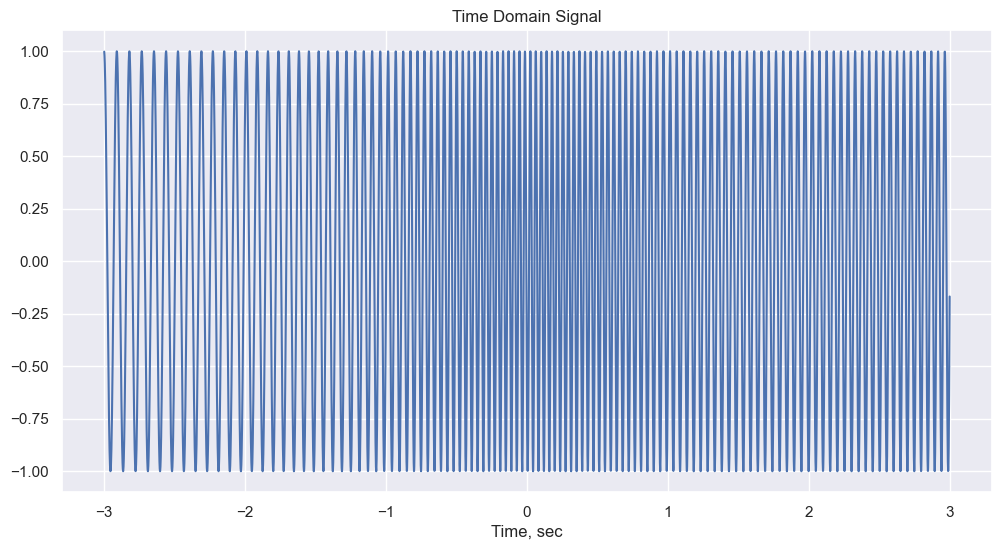

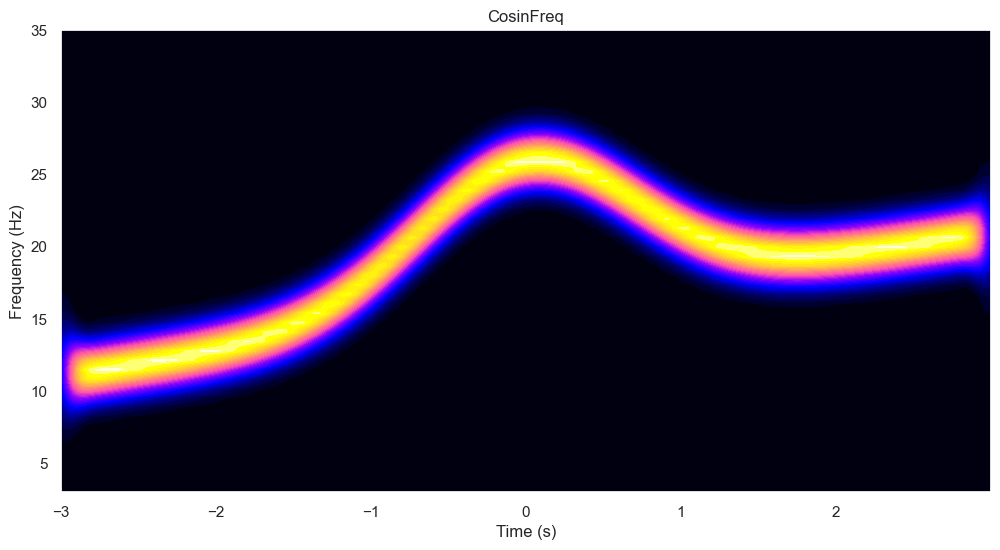

In [10]:
for i in range(wavelets.shape[0]):
    gaussian = np.exp(-(4*np.log(2)*time**2) / fwhm**2)
    # complex Morlet wavelet
    wavelets[i,:] = np.exp(1j*2*np.pi*frex[i]*time) * gaussian

nconv = pnts*2-1
halfk = int(np.floor(pnts/2)+1)
sigX = scipy.fftpack.fft(signal,nconv);
tf = np.zeros([nfrex,pnts])

for fi in range(tf.shape[0]):
    waveX = scipy.fftpack.fft(wavelets[fi,:],nconv)
    waveX = waveX / np.max(waveX)
    convres = scipy.fftpack.ifft(waveX*sigX)
    convres = convres[halfk-3:-halfk]
    tf[fi, :] = np.abs(convres)**2

fig = plt.figure(figsize=(12, 6))
plt.title('Time Domain Signal')
plt.xlabel('Time, sec')
plt.plot(time, signal)
plt.show()

fig = plt.figure(figsize=(12, 6))
plt.title('CosinFreq')
cs = plt.contourf(time,frex,tf,40, cmap=plt.get_cmap('gnuplot2'))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cs.changed()

# Brain Activity

In [11]:
braindat = scipy.io.loadmat('Lab5_Data.mat')

In [12]:
braindat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Sep 01 21:46:43 2018',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[12.203051, 16.38355 , 12.084306, ..., 21.902597, 16.780333,
         17.64946 ]], dtype=float32),
 'srate': array([[762.93945312]]),
 'timevec': array([[-0.49992064, -0.49860992, -0.4972992 , ...,  1.49761664,
          1.49892736,  1.50023808]])}

In [13]:
data = braindat['data'][0]
srate = braindat['srate'][0]
timevec = braindat['timevec'][0]

In [14]:
nfrex = 100
frex = np.linspace(5, 70, nfrex)
fwhm = .2

wavetime = np.arange(-2, 2, 1 / srate)
wavelets = np.zeros([nfrex, len(wavetime)], dtype=complex)
for wi in range(wavelets.shape[0]):
    gaussian = np.exp(-(4 * np.log(2) * wavetime ** 2) / fwhm ** 2)
    wavelets[wi, :] = np.exp(1j * 2 * np.pi * frex[wi] * wavetime) * gaussian

In [15]:
nconv = len(timevec) + len(wavetime) - 1
halfk = int(np.floor(len(wavetime) / 2))
sigX = scipy.fftpack.fft(data, nconv)
tf = np.zeros((nfrex, len(timevec)))
for fi in range(0, nfrex):
    waveX = scipy.fftpack.fft(wavelets[fi, :], nconv)
    waveX = waveX / np.max(waveX)
    convres_morlet = scipy.fftpack.ifft(waveX * sigX)
    convres_morlet = convres_morlet[halfk-1:-halfk]
    tf[fi, :] = np.abs(convres_morlet) ** 2

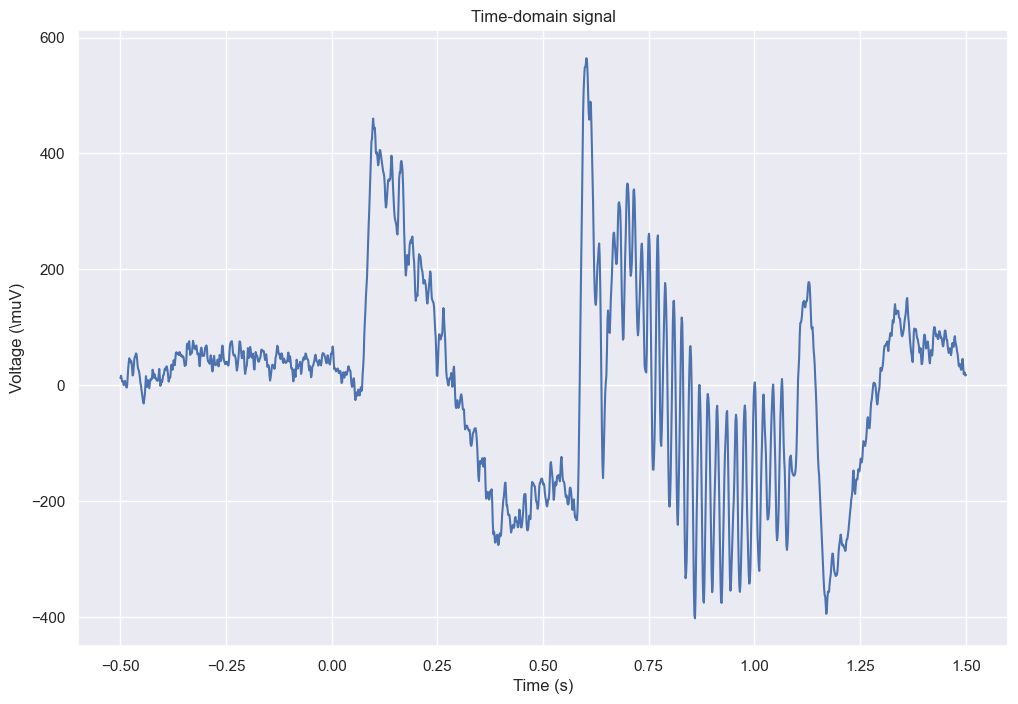

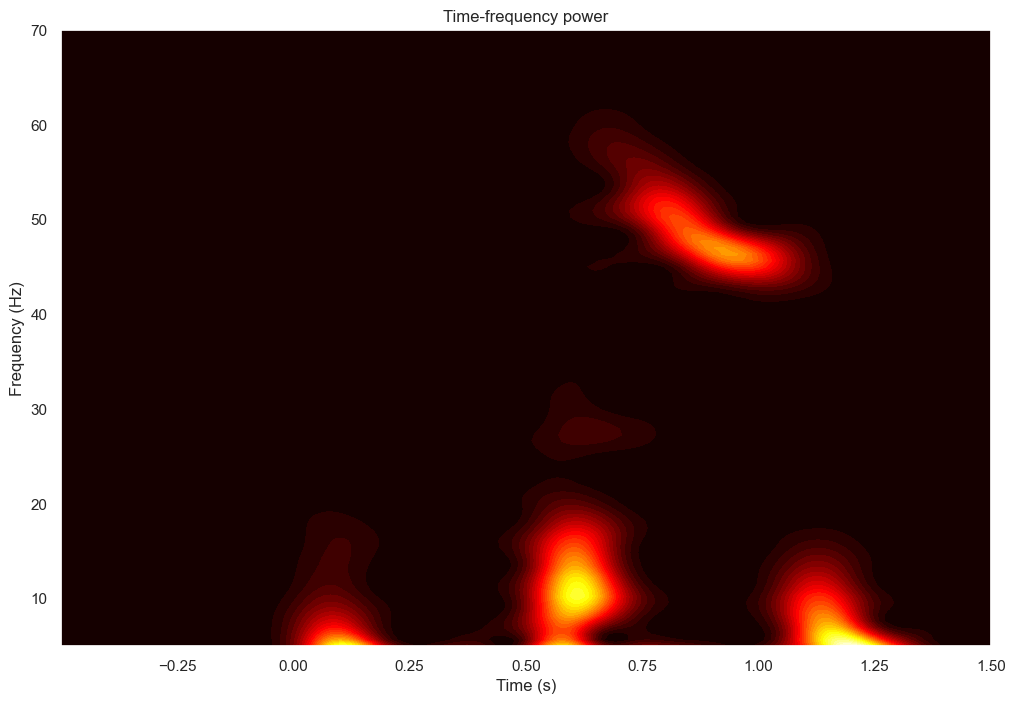

In [16]:
fig = plt.figure(figsize=(12, 8))
plt.title('Time-domain signal')
plt.plot(timevec, data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (\muV)')
plt.show()

fig = plt.figure(figsize=(12, 8))
plt.title('Time-frequency power')
plt.contourf(timevec, frex, tf,36, cmap=plt.get_cmap('hot'))
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)')
plt.show()